In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #biblioteca de machine learning en Python

In [2]:
tracción1=pd.read_excel(r'C:\Users\allan\Documents\Repositories\fisica-experimental\Propiedades Mecánicas\Datos\Tracción_K15-02-2022_y_J17-02-2022_FísicaExperimental.ods')
tracción1.head()

Position [mm]  Force [N]  Time [s]
0        0.00000       10.0   0.00000
1        0.00000       10.0   0.00000
2        0.00165       11.1   0.02475
3        0.00620       18.8   0.09300
4        0.01010       32.1   0.15150

In [3]:
tracción1.columns

Index(['Position [mm]', 'Force [N]', 'Time [s]'], dtype='object')

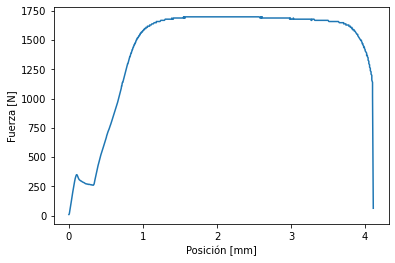

In [4]:
plt.plot(tracción1['Position [mm]'],tracción1['Force [N]'])
plt.xlabel("Posición [mm]")
plt.ylabel("Fuerza [N]")
plt.show()

In [5]:
A=(10.19/0.13**2+9.744/0.088**2)/(1/0.13**2+1/0.088**2)
A
# A=10.15

9.884148677162797

In [6]:
L=(64.156/0.151**2+68.608/0.217**2)/(1/0.151**2+1/0.217**2)
L
# L=50

65.60842598368866

In [7]:
rl=LinearRegression()
x=tracción1['Position [mm]'].values
y=tracción1['Force [N]'].values

In [8]:
y=y[np.where((x<0.1))].reshape(-1,1)/A
x=x[np.where((x<0.1))].reshape(-1,1)/L

In [9]:
rl.fit(x,y)
rl.score(x,y),rl.coef_

(0.9964483660225802, array([[24348.19701079]]))

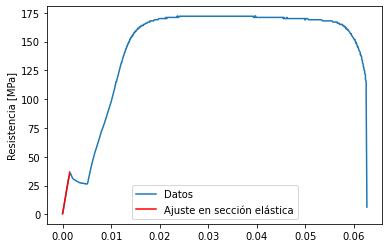

In [10]:
plt.plot(tracción1['Position [mm]'].values/L,tracción1['Force [N]'].values/A)
plt.plot(x,rl.predict(x),color="red")
plt.xlabel("")
plt.ylabel("Resistencia [MPa]")
plt.legend(["Datos","Ajuste en sección elástica"])
plt.show()

In [11]:
tracción2=pd.read_excel(r'C:\Users\allan\Documents\Repositories\fisica-experimental\Propiedades Mecánicas\Datos\Tracción_K15-02-2022_y_J17-02-2022_FísicaExperimental.ods',sheet_name=1)
tracción2.head()

Position [mm]  Force [N]  Time [s]
0       0.000000      0.000  0.000000
1       0.000071      0.000  0.001068
2       0.003280      2.141  0.049200
3       0.007420     11.060  0.111300
4       0.011700     25.180  0.175500

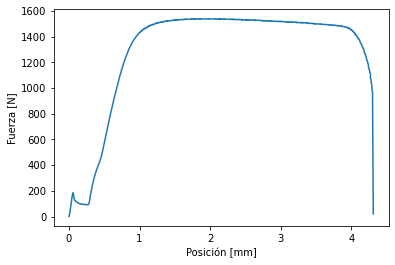

In [12]:
plt.plot(tracción2['Position [mm]'],tracción2['Force [N]'])
plt.xlabel("Posición [mm]")
plt.ylabel("Fuerza [N]")
plt.show()

In [13]:
rl2=LinearRegression()
x2=tracción2['Position [mm]'].values
y2=tracción2['Force [N]'].values

In [14]:
y2=y2[np.where((x2<0.05))].reshape(-1,1)/A
x2=x2[np.where((x2<0.05))].reshape(-1,1)/L

In [15]:
rl2.fit(x2,y2)
rl2.score(x2,y2),rl2.coef_

(0.991481844080084, array([[23734.06348233]]))

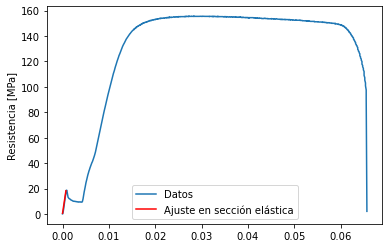

In [16]:
plt.plot(tracción2['Position [mm]'].values/L,tracción2['Force [N]'].values/A)
plt.plot(x2,rl.predict(x2),color="red")
plt.xlabel("")
plt.ylabel("Resistencia [MPa]")
plt.legend(["Datos","Ajuste en sección elástica"])
plt.show()

In [17]:
tracción3=pd.read_excel(r'C:\Users\allan\Documents\Repositories\fisica-experimental\Propiedades Mecánicas\Datos\Tracción_K15-02-2022_y_J17-02-2022_FísicaExperimental.ods',sheet_name=2)
tracción3.head()

Position [mm]  Force [N]  Time [s]
0        0.00000      0.300    0.0000
1        0.00280      3.163    0.0420
2        0.00638     10.640    0.0957
3        0.01030     22.200    0.1545
4        0.01470     37.970    0.2205

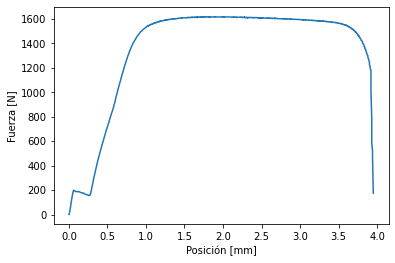

In [18]:
plt.plot(tracción3['Position [mm]'],tracción3['Force [N]'])
plt.xlabel("Posición [mm]")
plt.ylabel("Fuerza [N]")
plt.show()

In [19]:
rl3=LinearRegression()
x3=tracción3['Position [mm]'].values
y3=tracción3['Force [N]'].values

In [20]:
y3=y3[np.where((x3<0.06))].reshape(-1,1)/A
x3=x3[np.where((x3<0.06))].reshape(-1,1)/L

In [21]:
rl3.fit(x3,y3)
rl3.score(x3,y3),rl3.coef_

(0.9949260714313495, array([[23973.92667556]]))

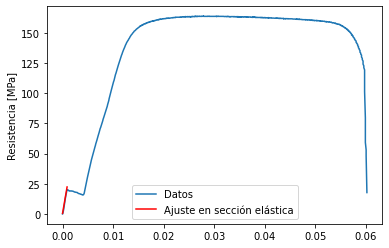

In [22]:
plt.plot(tracción3['Position [mm]'].values/L,tracción3['Force [N]'].values/A)
plt.plot(x3,rl.predict(x3),color="red")
plt.xlabel("")
plt.ylabel("Resistencia [MPa]")
plt.legend(["Datos","Ajuste en sección elástica"])
plt.show()

In [23]:
X=np.concatenate([x,x2,x3],axis=0)
Y=np.concatenate([y,y2,y3],axis=0)

In [24]:
rl=LinearRegression()
rl.fit(X,Y)
rl.score(X,Y),rl.coef_

(0.9913703578126101, array([[24985.19200669]]))

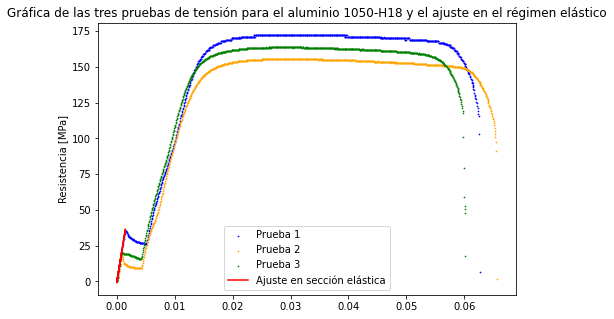

In [25]:
plt.figure(figsize=(7.5,5))
plt.scatter(tracción1['Position [mm]'].values/L,tracción1['Force [N]'].values/A,s=2,marker=".",color="blue")
plt.scatter(tracción2['Position [mm]'].values/L,tracción2['Force [N]'].values/A,s=2,marker=".",color="orange")
plt.scatter(tracción3['Position [mm]'].values/L,tracción3['Force [N]'].values/A,s=2,marker=".",color="green")
plt.plot(X,rl.predict(X),color="red")
plt.xlabel("")
plt.ylabel("Resistencia [MPa]")
plt.legend(["Prueba 1","Prueba 2","Prueba 3","Ajuste en sección elástica"])
plt.title("Gráfica de las tres pruebas de tensión para el aluminio 1050-H18 y el ajuste en el régimen elástico")
plt.show()

In [26]:
syx=np.sqrt(np.sum((rl.predict(X)-Y)**2)/(len(X)-2))
scoef=syx/np.sqrt(np.sum((X-X.mean())**2))
sint=syx*np.sqrt(np.sum(X**2)/(len(X)*np.sum((X-X.mean())**2)))

In [27]:
scoef,sint

(320.2013703805424, 0.21769215376911086)

In [28]:
from scipy.stats import t

In [29]:
t.ppf(0.9545,len(X)-2)*scoef,t.ppf(0.9545,len(X)-2)*sint

(551.2142027604975, 0.374748574137732)